# 문서 전처리
### >> 문서 분석의 경우 숫자로 구성된 특징 벡터(feature vector)를 문서로부터 추출하는 과정이 필요. -> 문서 전처리(document preprocessing) 

# BOW(Bag of Word)
### >> 문서를 숫자 벡터로 변환하는 가장 기본적인 방법.
### >> 문서(D1, D2, D2)를 구성하는 고정된 단어장(W1, W2, W3)을 만들고 Di라는 개별 문서에 단어장에 해당하는 단어들이 포함되어있는지를 표시

# Scikit-Learn의 문서 전처리 기능
### Scikit-Learn의 feature_extraction.text 서브 패키지
#### >> CountVectorizer : 문서 집합으로부터 단어의 수를 세어 카운트 행렬을 만든다.
#### >> TfidVectorizer : 문서 집합으로부터 단어의 수를 세고 TF-IDF 방식으로 단어의 가중치를 조정한 카운트 행렬 생성
#### >> HashingVectorizer : hashing trick을 사용하여 빠르게 카운트 행렬을 만든다.

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.stem import SnowballStemmer

In [1]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?'
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [2]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [3]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [5]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

# 문서 처리 옵션
### CountVectorizer는 다양한 인수를 가진다. 그 중 중요한 것들은 다음과 같다.
#### stop_words : 문자열 {‘english’}, 리스트 또는 None (디폴트) / stop words 목록.‘english’이면 영어용 스탑 워드 사용.
#### analyzer : 문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수 / 단어 n-그램, 문자 n-그램, 단어 내의 문자 n-그램
#### tokenizer : 함수 또는 None (디폴트) / 토큰 생성 함수 .
#### token_pattern : string / 토큰 정의용 정규 표현식
#### ngram_range : (min_n, max_n) 튜플 / n-그램 범위
#### max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 / 단어장에 포함되기 위한 최대 빈도
#### min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1 / 단어장에 포함되기 위한 최소 빈도
#### vocabulary : 사전이나 리스트 / 단어장

# Stop Words
### >> 문서에서 단어장을 생성할 떄 무시할 수 있는 단어를 의미.
### >>> 보통 영어의 관사나 접속사. 한국어의 조사 등이 해당됨
### >>> stop_sords 인수로 조절할 수 있다.

In [6]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'last': 2, 'one': 3, 'second': 4, 'third': 5}

In [7]:
vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

# 토큰(token)
### >> 토큰은 문서에서 단어장을 생성할 떄 하나의 단어가 되는 단위를 말한다.
### >>> analyzer, tokenizer, token_pattern 등의 인수로 조절 가능

In [9]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{' ': 0,
 '.': 1,
 '?': 2,
 'a': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'h': 8,
 'i': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'u': 17}

In [14]:
nltk.download("punkt")
vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'.': 0,
 '?': 1,
 'and': 2,
 'document': 3,
 'first': 4,
 'is': 5,
 'last': 6,
 'one': 7,
 'second': 8,
 'the': 9,
 'third': 10,
 'this': 11}

In [16]:
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'third': 1, 'this': 2}

# n-그램
### >> n=그램은 단어장 생성에 사용할 토큰의 크기를 결정.
#### >>> 1-그림은 토큰 하나만 단어로 사용하며, 2-그램은 두 개의 연결된 토큰을 하나의 단어로 사용

In [17]:
vect = CountVectorizer(ngram_range=(2,2)).fit(corpus)
vect.vocabulary_

{'and the': 0,
 'first document': 1,
 'is the': 2,
 'is this': 3,
 'last document': 4,
 'second document': 5,
 'second second': 6,
 'the first': 7,
 'the last': 8,
 'the second': 9,
 'the third': 10,
 'third one': 11,
 'this is': 12,
 'this the': 13}

In [18]:
vect = CountVectorizer(ngram_range=(1,2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'the third': 1, 'third': 2, 'this': 3, 'this the': 4}

# 빈도수
### >> max_df, min_df 인수 사용. 문서에서 토큰이 나타난 횟수를 기준으로 단어장 구성 가능. 
#### >>> max_df로 지정한 값을 초과하거나 min_dif로 지정한 값보다 작은 경우에는 무시.
#### >>> 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중 의미

In [20]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'document': 0, 'first': 1, 'is': 2, 'this': 3},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [21]:
vect.transform(corpus).toarray().sum(axis=0)

array([4, 2, 3, 3], dtype=int64)

# TF-IDF(Team Frequency - Inverse Document Frequency)
### >> 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법

In [26]:
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.24151532,  0.        ,  0.28709733,  0.        ,
         0.        ,  0.85737594,  0.20427211,  0.        ,  0.28709733],
       [ 0.55666851,  0.        ,  0.        ,  0.        ,  0.        ,
         0.55666851,  0.        ,  0.26525553,  0.55666851,  0.        ],
       [ 0.        ,  0.38947624,  0.55775063,  0.4629834 ,  0.        ,
         0.        ,  0.        ,  0.32941651,  0.        ,  0.4629834 ],
       [ 0.        ,  0.45333103,  0.        ,  0.        ,  0.80465933,
         0.        ,  0.        ,  0.38342448,  0.        ,  0.        ]])

# Hashing Trick
#### >> CountVectorizer는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능해진다.
#### >> HashingVectorizer를 사용하면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 즐길 수 있다.

In [28]:
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [29]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 6.17 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [33]:
hv = HashingVectorizer(n_features=10)

In [34]:
%time hv.transform(twenty.data)

Wall time: 3.28 s


<11314x10 sparse matrix of type '<class 'numpy.float64'>'
	with 112863 stored elements in Compressed Sparse Row format>

# 형태소 분석기 이용

In [35]:
corpus = ["imaging", "image", "imagination", "imagine"," buys", "buying", "bought"]
vect = CountVectorizer().fit(corpus)
vect.vocabulary_

{'bought': 0,
 'buying': 1,
 'buys': 2,
 'image': 3,
 'imagination': 4,
 'imagine': 5,
 'imaging': 6}

In [37]:
twenty = fetch_20newsgroups()
docs = twenty.data[:100]

In [38]:
vect = CountVectorizer(stop_words="english", token_pattern="wri\w+").fit(docs)
vect.vocabulary_

{'write': 0,
 'writer': 1,
 'writers': 2,
 'writes': 3,
 'writing': 4,
 'writing_': 5,
 'written': 6}

In [42]:
class StemTokenizer(object):
    def __init__(self):
        self.s = SnowballStemmer('english')
        self.t = CountVectorizer(stop_words="english", token_pattern="wri\w+").build_tokenizer()
    def __call__(self, doc):
        return [self.s.stem(t) for t in self.t(doc)]

vect = CountVectorizer(tokenizer=StemTokenizer()).fit(docs)
vect.vocabulary_

{'write': 0, 'writer': 1, 'writing_': 2, 'written': 3}

# 예

In [67]:
from urllib.request import urlopen
import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
hannanum = Hannanum()

In [68]:
req = urlopen("https://www.datascienceschool.net/download-notebook/708e711429a646818b9dcbb581e0c10a/")
json=json.loads(req.read())
cell = ["\n".join(c["source"]) for c in json["cells"] if c["cell_type"] == u"markdown"]
docs = [w for w in hannanum.nouns(" ".join(cell)) if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))]

#### 여기에서는 하나의 문서가 하나의 단어로만 이루어져 있다. 따라서 CountVectorizer로 이 문서 집합을 처리하면 각 문서는 하나의 원소만 1이고 나머지 원소는 0인 벡터가 된다. 이 벡터의 합으로 빈도를 알아보았다.

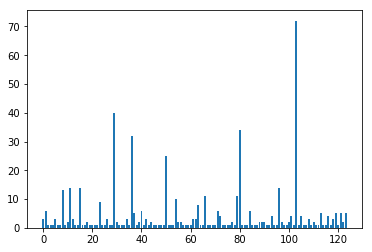

In [69]:
vect = CountVectorizer().fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
plt.bar(range(len(count)), count)
plt.show()

In [70]:
pprint(zip(vect.get_feature_names(), count))

In [71]:
a = vect.get_feature_names(), count
pprint(a)

(['377ad03459bf',
  'a181562ac4d8',
  'a1e4ed2ac65b',
  'container',
  'daemon',
  'dockeruser',
  'id',
  'image',
  'mingw64',
  'tag',
  '가능',
  '가동',
  '가상',
  '가지',
  '개념',
  '경우',
  '공유',
  '관련',
  '관련하',
  '길벗',
  '나오기',
  '내부',
  '내용',
  '다음',
  '대표적',
  '대화적',
  '대화형',
  '데몬',
  '도서출판',
  '도커',
  '동작',
  '때문',
  '리눅스',
  '마지막',
  '마찬가지',
  '머신',
  '명령',
  '명령어',
  '명시',
  '명시해',
  '목록',
  '문자',
  '문자열',
  '문제',
  '문헌',
  '버튼',
  '복사',
  '복수',
  '복수개의',
  '브라우저',
  '사용',
  '사용법',
  '사용자',
  '사용해',
  '삭제',
  '상태',
  '생각',
  '생략',
  '생성',
  '설명',
  '소개',
  '수행',
  '시스템',
  '시작',
  '실행',
  '아래',
  '아이디',
  '여기',
  '연결',
  '연습',
  '오류',
  '옵션',
  '외부',
  '요약',
  '원본',
  '윈도우즈',
  '으로',
  '의미',
  '의존',
  '이름',
  '이미지',
  '이재홍',
  '이해',
  '일부분',
  '입력',
  '자동',
  '자체',
  '작동',
  '작업',
  '재시작',
  '저장',
  '정지',
  '조합',
  '존재',
  '주의해',
  '중복',
  '중지',
  '지정',
  '초간단',
  '최소한',
  '추가',
  '출력',
  '컨테이',
  '컨테이너',
  '컨테이너상',
  '컴퓨터',
  '콜론',
  '태그',
  '터미널',
  '툴박스',
  '특정',
  '파일',
  '포워

In [72]:
vect.vocabulary_

{'377ad03459bf': 0,
 'a181562ac4d8': 1,
 'a1e4ed2ac65b': 2,
 'container': 3,
 'daemon': 4,
 'dockeruser': 5,
 'id': 6,
 'image': 7,
 'mingw64': 8,
 'tag': 9,
 '가능': 10,
 '가동': 11,
 '가상': 12,
 '가지': 13,
 '개념': 14,
 '경우': 15,
 '공유': 16,
 '관련': 17,
 '관련하': 18,
 '길벗': 19,
 '나오기': 20,
 '내부': 21,
 '내용': 22,
 '다음': 23,
 '대표적': 24,
 '대화적': 25,
 '대화형': 26,
 '데몬': 27,
 '도서출판': 28,
 '도커': 29,
 '동작': 30,
 '때문': 31,
 '리눅스': 32,
 '마지막': 33,
 '마찬가지': 34,
 '머신': 35,
 '명령': 36,
 '명령어': 37,
 '명시': 38,
 '명시해': 39,
 '목록': 40,
 '문자': 41,
 '문자열': 42,
 '문제': 43,
 '문헌': 44,
 '버튼': 45,
 '복사': 46,
 '복수': 47,
 '복수개의': 48,
 '브라우저': 49,
 '사용': 50,
 '사용법': 51,
 '사용자': 52,
 '사용해': 53,
 '삭제': 54,
 '상태': 55,
 '생각': 56,
 '생략': 57,
 '생성': 58,
 '설명': 59,
 '소개': 60,
 '수행': 61,
 '시스템': 62,
 '시작': 63,
 '실행': 64,
 '아래': 65,
 '아이디': 66,
 '여기': 67,
 '연결': 68,
 '연습': 69,
 '오류': 70,
 '옵션': 71,
 '외부': 72,
 '요약': 73,
 '원본': 74,
 '윈도우즈': 75,
 '으로': 76,
 '의미': 77,
 '의존': 78,
 '이름': 79,
 '이미지': 80,
 '이재홍': 81,
 '이해': 82,
 '일부분': 83,
